This file attempts to read the relevant TLEF data and make simple bar charts. This is a work in progress.

# Preparing the data

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 10,4
# pd.options.mode.chained_assignment = None #removed annoying pandas warning when making chained assigment

## Loading the data

In [3]:
excel_data = pd.ExcelFile("data/TLEF Impact Data_11292017.xlsx")

In [4]:
df_focus = excel_data.parse("Focus & Context")
df_evidence = excel_data.parse("Evidence & Sustainment",skiprows=1)

In [5]:
df_focus.head()

,PROJECT ID,Resource development (e.g. media; open resources; reading and PD materials; learning modules; apps),Infrastructure development (e.g. LMS; repositories; physical spaces),Pedagogies for student learning and/or engagement (e.g. flipped classroom; active learning; student-generated content; student choice; peer-collaboration),Teaching roles and training (e.g. co-teaching; TA roles; office hours; participation in PD),Curriculum and design (e.g. learning/course/program design; cross and trans disciplinary courses/programs; formulation of course/program learning outcomes),Innovative assessment (e.g. two-stage exams; peer-assessment; engaging assessments; student choice),Community outreach and values (e.g. community service; social networks; co-op; social inclusion and equity; indigenous; wellbeing),Other,Faculty,Type,Year,Funds received,Evaluation TLEF $ Asks
0,2013FL1_APSC_CIVL_Yonemitsu,x,NaN,x,NaN,NaN,NaN,NaN,NaN,APSC,FL/Large,2013,66135.0,None
1,2013FL1_APSC_NURS_Macphee,x,NaN,x,x,x,NaN,NaN,NaN,APSC,FL/Large,2013,254808.0,TLF
2,2013FL1_ARTS_PSYC_Barnes,x,NaN,x,NaN,NaN,NaN,NaN,NaN,ARTS,FL/Large,2013,59806.0,None
3,2013FL1_ARTS_GRSI_Stewart,NaN,NaN,x,NaN,NaN,NaN,x,NaN,ARTS,FL/Large,2013,34356.0,None
4,2013FL1_ARTS_LING_Matthewson,x,x,x,NaN,NaN,NaN,NaN,NaN,ARTS,FL/Large,2013,167022.0,TLF


In [6]:
df_evidence.head()

,PROJECT ID,Student learning and knowledge,Student engagement and attitudes,Instructional team teaching practice and satisfaction,Other,Operations & Department capacity,Influence in priorities/direction,Other.1,Courses and programs,Resources and infrastructure,Scholarly contributions,Other.2,Project sustainment after closure,Expansion beyond original plan,Other.3,Evaluation TLEF $ Asks
0,2013FL1_APSC_CIVL_Yonemitsu,Evidence,Evidence,Evidence,No information,Evidence,No information,No information,No information,Faculty,No information,No information,Evidence,Ideas,No information,None
1,2013FL1_APSC_NURS_Macphee,Evidence,Evidence,Evidence,No information,Evidence,Evidence,No information,Unit,Unit,External,No information,Evidence,No information,No information,TLF
2,2013FL1_ARTS_PSYC_Barnes,Evidence,Anecdotal,Evidence,No information,No information,Evidence,No information,Faculty,Faculty,External,No information,Evidence,Evidence,No information,None
3,2013FL1_ARTS_GRSI_Stewart,No information,Anecdotal,Evidence,No information,No information,No information,No information,No information,Single course,No information,No information,Ideas,No information,No information,None
4,2013FL1_ARTS_LING_Matthewson,No information,Evidence,Evidence,No information,Evidence,No information,No information,Multi course,Multi course,UBC,No information,Ideas,Ideas,No information,TLF


## Cleaning the data

We check that both dfs have the same project ids.

In [7]:
projects_focus = set(list(df_focus['PROJECT ID']))
projects_evidence = set(list(df_evidence['PROJECT ID']))
projects_evidence == projects_focus

True

We convert the NaN and change the "x" into 1.

In [8]:
df_focus.replace('x',1,inplace=True)
df_focus.replace('x (intership facilitation)',1,inplace=True)
df_focus.replace('NAN',0,inplace=True)

In [9]:
categories = [
    "Resource development (e.g. media; open resources; reading and PD materials; learning modules; apps)",
    "Infrastructure development (e.g. LMS; repositories; physical spaces)",
    "Pedagogies for student learning and/or engagement (e.g. flipped classroom; active learning; student-generated content; student choice; peer-collaboration)",
    "Teaching roles and training (e.g. co-teaching; TA roles; office hours; participation in PD)",
    "Curriculum and design (e.g. learning/course/program design; cross and trans disciplinary courses/programs; formulation of course/program learning outcomes)",
    "Innovative assessment (e.g. two-stage exams; peer-assessment; engaging assessments; student choice)",
    "Community outreach and values (e.g. community service; social networks; co-op; social inclusion and equity; indigenous; wellbeing)",
    "Other"]
short_categories = [c.split('(')[0] for c in categories]

# Descriptives

In [10]:
N = len(projects_evidence)
print "There are {0} projects to analyze.".format(N)

There are 77 projects to analyze.


## How much funding does a project typically get?

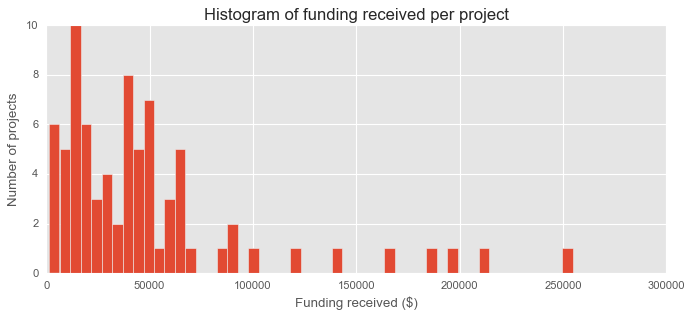

In [11]:
df_focus['Funds received'].hist(bins=50)
ax = plt.subplot();ax.set_xlabel('Funding received ($)',fontsize=12);ax.set_ylabel('Number of projects',fontsize=12)
ax.set_title("Histogram of funding received per project",fontsize=15);

We may want to consider splitting projects into low, medium, and high funding groups

## Which faculties are most represented?

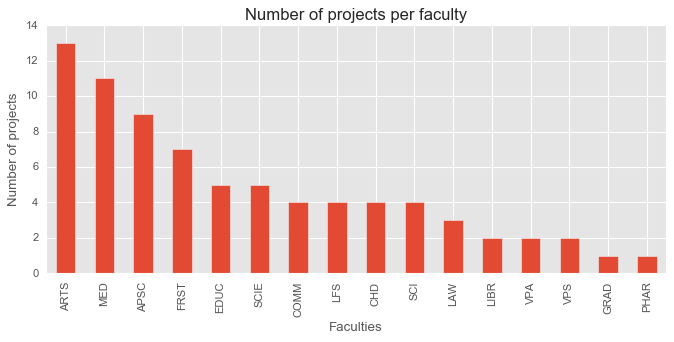

In [12]:
df_focus['Faculty'].value_counts().plot(kind='bar')
ax = plt.subplot();ax.set_xlabel('Faculties',fontsize=12);ax.set_ylabel('Number of projects',fontsize=12)
ax.set_title("Number of projects per faculty",fontsize=15);

## How many foci do most projects have?

Out of the 7 possible foci, many project target several of them, but how many?

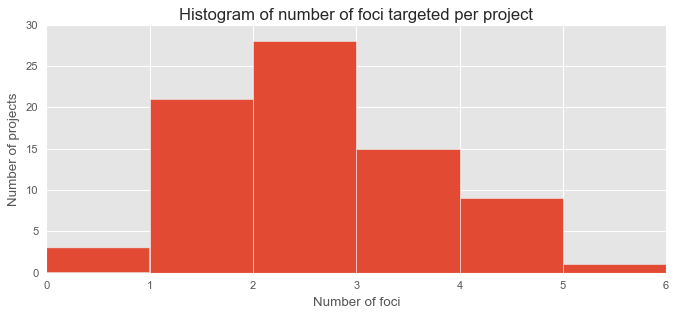

In [13]:
df_focus[categories+["Other"]].sum(axis=1).hist(bins=range(int(max(df_focus[categories].sum(axis=1)))+2))
ax = plt.subplot();ax.set_xlabel('Number of foci',fontsize=12);ax.set_ylabel('Number of projects',fontsize=12)
ax.set_title("Histogram of number of foci targeted per project",fontsize=15);

It seems like a few projects have no foci... here they are below:

In [14]:
df_focus[df_focus[categories+["Other"]].sum(axis=1)==0]

,PROJECT ID,Resource development (e.g. media; open resources; reading and PD materials; learning modules; apps),Infrastructure development (e.g. LMS; repositories; physical spaces),Pedagogies for student learning and/or engagement (e.g. flipped classroom; active learning; student-generated content; student choice; peer-collaboration),Teaching roles and training (e.g. co-teaching; TA roles; office hours; participation in PD),Curriculum and design (e.g. learning/course/program design; cross and trans disciplinary courses/programs; formulation of course/program learning outcomes),Innovative assessment (e.g. two-stage exams; peer-assessment; engaging assessments; student choice),Community outreach and values (e.g. community service; social networks; co-op; social inclusion and equity; indigenous; wellbeing),Other,Faculty,Type,Year,Funds received,Evaluation TLEF $ Asks
6,2013FL1_ARTS_ISIT_Cutler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ARTS,FL/Large,2013,197000.0,None
20,2013FL1_LFS_APBI_Krzic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LFS,FL/Large,2013,46430.0,None
46,14-004 Balanko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,APSC,Small,2014,88600.0,None


Also, many projects have 4 or 5 foci... maybe these projects are to big for their own good? We can investigate this later looking at funding allocated and level of evidence they reported.

## What do project typically focus on?

In [15]:
t = []
for c in categories:
    t.append([c.split('(')[0],int(df_focus[c].sum()),str(int(float(df_focus[c].sum())/N*100))+"%"])
print tabulate(t,headers=['Focus','Number for projects out of '+str(N),'Percentage'])

Focus                                                Number for projects out of 77  Percentage
-------------------------------------------------  -------------------------------  ------------
Resource development                                                            56  72%
Infrastructure development                                                       9  11%
Pedagogies for student learning and/or engagement                               35  45%
Teaching roles and training                                                      5  6%
Curriculum and design                                                           27  35%
Innovative assessment                                                            8  10%
Community outreach and values                                                   19  24%
Other                                                                            2  2%


## How many areas of impact to projects typically report evidence for?

In [16]:
objects = ["Student learning and knowledge",
    "Student engagement and attitudes",
    "Instructional team teaching practice and satisfaction",
    "Other",
    "Operations & Department capacity",
    "Influence in priorities/direction ",
    "Other"]

df_evidence['has evidence'] = df_evidence[objects].apply(pd.Series.value_counts, axis=1)[["Evidence"]].fillna(0)
df_evidence['has anecdotal'] = df_evidence[objects].apply(pd.Series.value_counts, axis=1)[["Anecdotal"]].fillna(0)
df_evidence['has no impact'] = df_evidence[objects].apply(pd.Series.value_counts, axis=1)[["No impact"]].fillna(0)
df_evidence['has no information'] = df_evidence[objects].apply(pd.Series.value_counts, axis=1)[["No information"]].fillna(0)
df_evidence['binary has evidence'] = (df_evidence['has evidence'] > 0).astype(int)
df_evidence['binary has anecdotal'] = (df_evidence['has anecdotal'] > 0).astype(int)
df_evidence['binary has no impact']= (df_evidence['has no impact'] > 0).astype(int)
df_evidence['binary has no information']= (df_evidence['has no information'] > 0).astype(int)

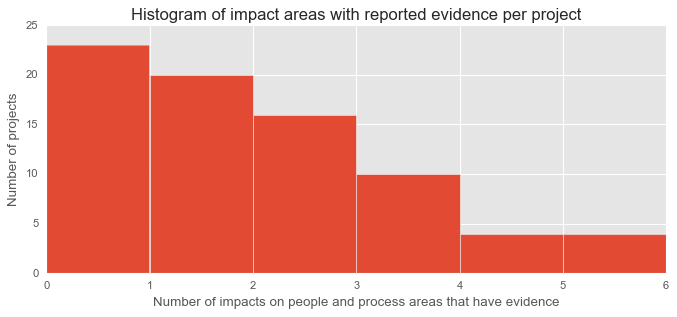

In [17]:
df_evidence['has evidence'].hist(bins=range(int(max(df_evidence['has evidence']))+2))
ax = plt.subplot();ax.set_xlabel('Number of impacts on people and process areas that have evidence',fontsize=12);ax.set_ylabel('Number of projects',fontsize=12)
ax.set_title("Histogram of impact areas with reported evidence per project",fontsize=15);

Evidence can be reported for 7 different areas (within people and process). Many project do not report evidence for any of these areas. A few report evidence for over 3 different areas.

## What levels of evidence are reported by how many projects?
(for impact on both people and processes)

In [18]:
t = []
t.append(["evidence",int(df_evidence['binary has evidence'].sum())])
t.append(["anecdotal",int(df_evidence['binary has anecdotal'].sum())])
t.append(["no impact",int(df_evidence['binary has no impact'].sum())])
t.append(["no information",int(df_evidence['binary has no information'].sum())])
print tabulate(t,headers=['Type of evidence','Number of projects out of '+str(N)+' that have (at least once) this level of evidence'])

Type of evidence      Number of projects out of 77 that have (at least once) this level of evidence
------------------  -------------------------------------------------------------------------------
evidence                                                                                         54
anecdotal                                                                                        24
no impact                                                                                         4
no information                                                                                   77


# Finding patterns between projects focus and reported evidence

## What focus areas are often jointly targeted by a project?

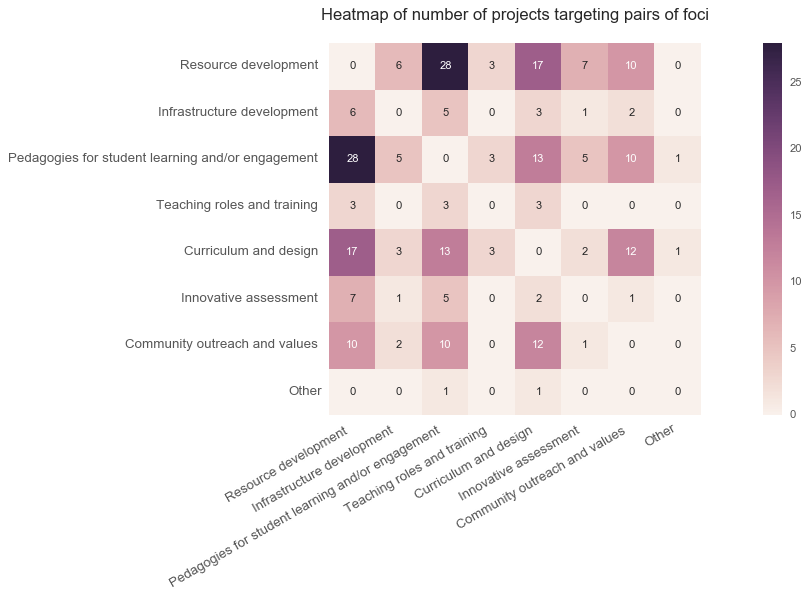

In [19]:
data_cats = np.zeros((len(categories),len(categories)))
for i,ci in enumerate(categories):
    for j,cj in enumerate(categories):
        if i!=j:
            data_cats[i,j] = int(df_focus[(df_focus[ci]==1)&(df_focus[cj]==1)][cj].sum())
df_cats = pd.DataFrame(data_cats,columns=categories)
fig, ax = plt.subplots(figsize=(20,6))
# mask = np.zeros_like(data_cats)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_cats, ax=ax, square=True, yticklabels=short_categories,annot=True)
ax.set_title("Heatmap of number of projects targeting pairs of foci\n",fontsize=15)
ax.set_xticklabels(short_categories,rotation=30,ha='right',fontsize=12)
ax.set_yticklabels(reversed(short_categories),fontsize=12);

Clearly, many areas of focus are simultaneously targeted. Notably:
* *Resource development* and *Pedagogies for student learning and/or engagement*
* *Resource development* and *Curriculum and design*

Note: the matrix is symetric and can be read from left to right or bottom to top

## What kind of evidence is reported per area of impact?

In [20]:
types_evidence = [
    "Student learning and knowledge",
    "Student engagement and attitudes",
    "Instructional team teaching practice and satisfaction",
    "Other",
    "Operations & Department capacity",
    "Influence in priorities/direction ",
    "Other.1"
]
types_evidence_names = [
    "Student learning and knowledge",
    "Student engagement and attitudes",
    "Instructional team teaching practice and satisfaction",
    "Other (impact to people)",
    "Operations & Department capacity",
    "Influence in priorities/direction ",
    "Other (impact to processes)"
]

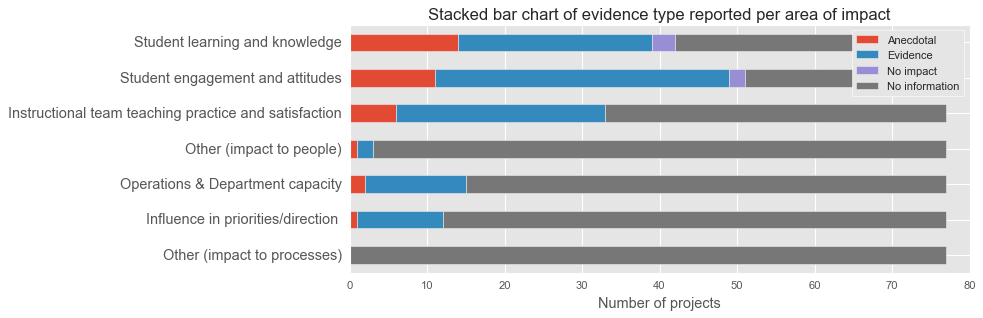

In [21]:
df_evidence[types_evidence].apply(lambda x: x.value_counts()).transpose().iloc[::-1,:].plot.barh(stacked=True)
ax = plt.subplot()
ax.legend(loc=1,frameon=True);ax.set_xlabel('Number of projects',fontsize=13)
ax.set_yticklabels(reversed(types_evidence_names),fontsize=13)
ax.set_title("Stacked bar chart of evidence type reported per area of impact",fontsize=15);

Clearly evidence is reported for some areas of intended impact. It's important to remember that "No information" means either that area was not intended to be impacted by project, or it was and no evidence was reported that there indeed was an impact.

## What project foci are related to reporting evidence for certain impact areas?
Are there any noticeable patterns when it comes to focus targeted and evidence collected in certain areas?

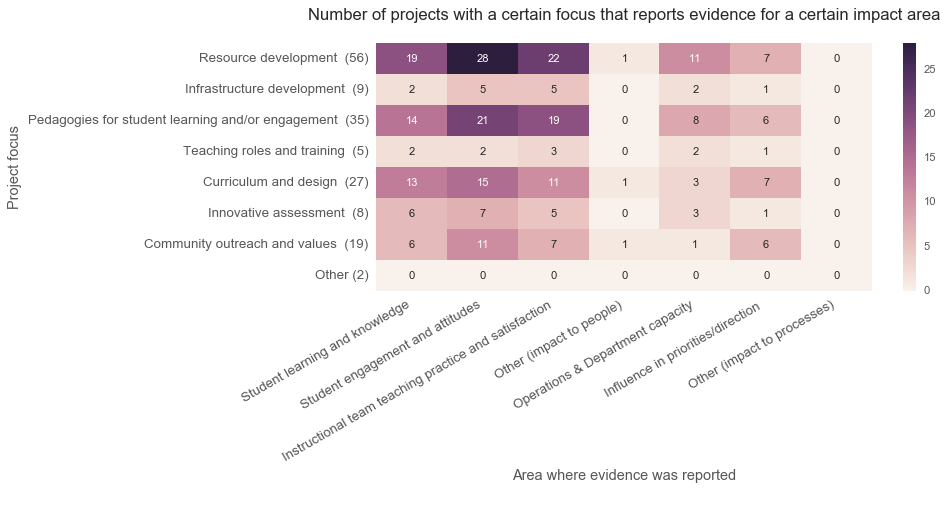

In [22]:
data_cats_evi = np.zeros((len(categories),len(types_evidence)))
for i,ci in enumerate(categories):
    for j,cj in enumerate(types_evidence):
        #projects for that category
        projects = list(df_focus[df_focus[ci]==1]['PROJECT ID'])
        #number of projects for that category and that area where evidence was found
        num = df_evidence[(df_evidence['PROJECT ID'].isin(projects))&(df_evidence[cj]=='Evidence')].shape[0]
#         data_cats_evi[i,j] = round(float(num)/df_focus[df_focus[ci]==1].shape[0]*100,0) #normalize by number of projects for that category
        data_cats_evi[i,j] = int(num)
ax = sns.heatmap(data_cats_evi, yticklabels=short_categories, annot=True)
ax.set_xticklabels(types_evidence_names,rotation=30,ha='right',fontsize=12)
ax.set_yticklabels(reversed([c + " ("+str(df_focus[df_focus[categories[i]]==1].shape[0])+")" for i,c in enumerate(short_categories)]),fontsize=12);
ax.set_xlabel('Area where evidence was reported\n',fontsize=13);ax.set_ylabel('Project focus',fontsize=13)
ax.set_title("Number of projects with a certain focus that reports evidence for a certain impact area\n",fontsize=15);

Here is the same data, normalized by focus.

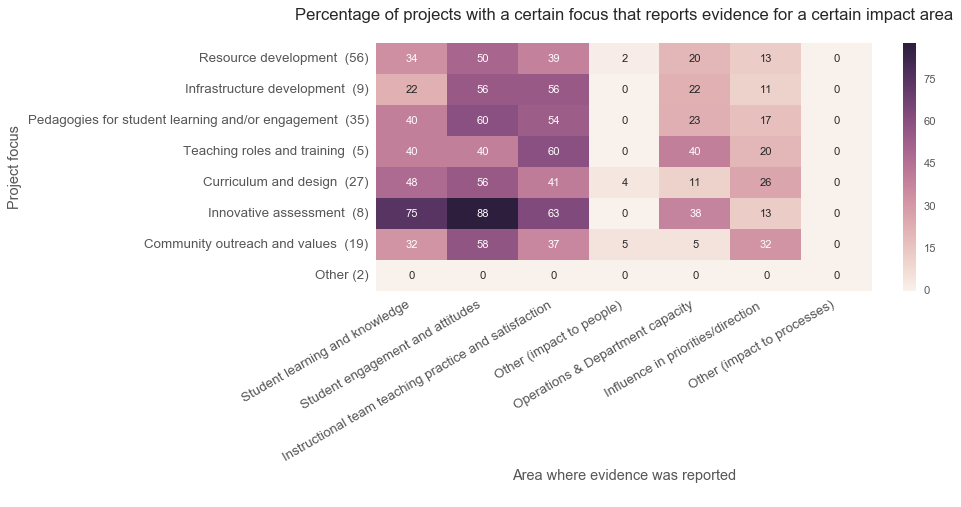

In [23]:
data_cats_evi = np.zeros((len(categories),len(types_evidence)))
for i,ci in enumerate(categories):
    for j,cj in enumerate(types_evidence):
        #projects for that category
        projects = list(df_focus[df_focus[ci]==1]['PROJECT ID'])
        #number of projects for that category and that area where evidence was found
        num = df_evidence[(df_evidence['PROJECT ID'].isin(projects))&(df_evidence[cj]=='Evidence')].shape[0]
        data_cats_evi[i,j] = round(float(num)/df_focus[df_focus[ci]==1].shape[0]*100,0) #normalize by number of projects for that category
#         data_cats_evi[i,j] = int(num)
ax = sns.heatmap(data_cats_evi, yticklabels=short_categories, annot=True)
ax.set_xticklabels(types_evidence_names,rotation=30,ha='right',fontsize=12)
ax.set_yticklabels(reversed([c + " ("+str(df_focus[df_focus[categories[i]]==1].shape[0])+")" for i,c in enumerate(short_categories)]),fontsize=12);
ax.set_xlabel('Area where evidence was reported\n',fontsize=13);ax.set_ylabel('Project focus',fontsize=13)
ax.set_title("Percentage of projects with a certain focus that reports evidence for a certain impact area\n",fontsize=15);

Some patterns we can see:

* Many projects that focus on *Resource development* report evidence in *Student learning*, *Student engagement* and *Instructional teaching practices*, specifically 34-50% of projects with that focus.


* Looking at projects focusing on *Pedagogies for student learning* we see that 40% report evidence on *Student learning and knowledge*.


* Looking at projects focusing on *Teaching roles and training* we see that 60% report evidence on *Insructional team teaching practice and satisfaction*.


* Another interesting pattern is that of the projects that conduct "Innovative assessment", 88% (7/8) report evidence on Student engagement and attitudes and 75% (6/8) report evidence on Student learning and Knowledge. Quite a promising result!